In [89]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [90]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [91]:
NUM_CLASSES = 10

# 学習データ読み込み

In [92]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [93]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [95]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [96]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                860       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [98]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [99]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
55/66 [========================>.....] - ETA: 0s - loss: 2.2882 - accuracy: 0.1304
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
66/66 [==============================] - 2s 12ms/step - loss: 2.2725 - accuracy: 0.1426 - val_loss: 2.1489 - val_accuracy: 0.2545
Epoch 2/1000
22/66 [=========>....................] - ETA: 0s - loss: 2.1638 - accuracy: 0.2294

/home/masooma/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/66 [========================>.....] - ETA: 0s - loss: 2.1042 - accuracy: 0.2530
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
66/66 [==============================] - 1s 8ms/step - loss: 2.0866 - accuracy: 0.2589 - val_loss: 1.8575 - val_accuracy: 0.3439
Epoch 3/1000
65/66 [============================>.] - ETA: 0s - loss: 1.8130 - accuracy: 0.3412
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
66/66 [==============================] - 1s 9ms/step - loss: 1.8104 - accuracy: 0.3422 - val_loss: 1.4495 - val_accuracy: 0.5499
Epoch 4/1000
63/66 [===========================>..] - ETA: 0s - loss: 1.5293 - accuracy: 0.4301
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
66/66 [==============================] - 0s 7ms/step - loss: 1.5246 - accuracy: 0.4326 - val_loss: 1.1106 - val_accuracy: 0.7309
Epoch 5/1000
58/66 [=========================>....] - ETA: 0s - loss: 1.3253 - accuracy: 0.4894
Epoch 5: savin

In [100]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

22/22 [==============================] - 0s 6ms/step - loss: 0.0762 - accuracy: 0.9979


In [101]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [102]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 128ms/step
[2.5900962e-10 5.1857654e-12 1.0544278e-21 1.6318206e-15 9.9999988e-01
 1.5537900e-14 1.5628451e-27 2.7757443e-09 9.5385921e-08 1.3346240e-24]
4


# 混同行列

88/88 [==============================] - 0s 4ms/step


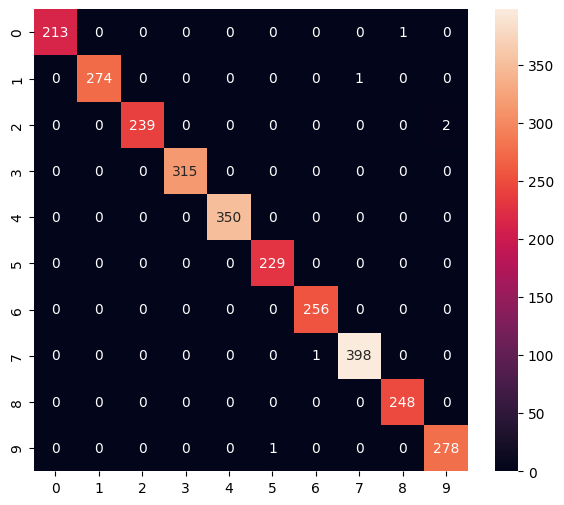

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       275
           2       1.00      0.99      1.00       241
           3       1.00      1.00      1.00       315
           4       1.00      1.00      1.00       350
           5       1.00      1.00      1.00       229
           6       1.00      1.00      1.00       256
           7       1.00      1.00      1.00       399
           8       1.00      1.00      1.00       248
           9       0.99      1.00      0.99       279

    accuracy                           1.00      2806
   macro avg       1.00      1.00      1.00      2806
weighted avg       1.00      1.00      1.00      2806



In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [104]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/home/masooma/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [105]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp2a5lwddn/assets


INFO:tensorflow:Assets written to: /tmp/tmp2a5lwddn/assets
2023-08-21 20:28:15.686378: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-21 20:28:15.686494: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-21 20:28:15.686987: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp2a5lwddn
2023-08-21 20:28:15.690804: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-21 20:28:15.690852: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmp2a5lwddn
2023-08-21 20:28:15.705057: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-08-21 20:28:15.819264: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmp2a5lwddn
2023-08-21 20:28:15.860582: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

6872

# 推論テスト

In [106]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [107]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [108]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [109]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 139 µs, sys: 49 µs, total: 188 µs
Wall time: 121 µs


In [110]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.5901009e-10 5.1857355e-12 1.0544318e-21 1.6318331e-15 9.9999988e-01
 1.5537900e-14 1.5628510e-27 2.7757447e-09 9.5385914e-08 1.3346290e-24]
4
